### Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [6,6]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

/var/folders/2m/7gvhhs715ydgyx00ps4pqjbc0000gn/T/ipykernel_8180/3400164582.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [46]:
df=pd.read_csv('cleaned/BEV_cleaned.csv')
df.drop(['Vehicle'],axis=1,inplace=True)

### Visualizations

<AxesSubplot: xlabel='Price (in euros)'>

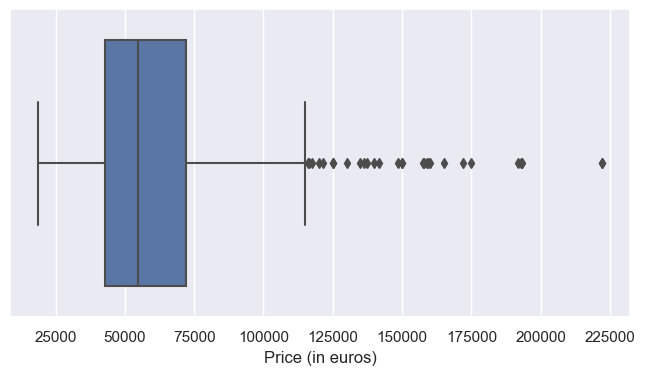

In [32]:
# find outliers in the price column
sns.boxplot(x=df['Price (in euros)'])

<AxesSubplot: xlabel='Orderable ', ylabel='Price (in euros)'>

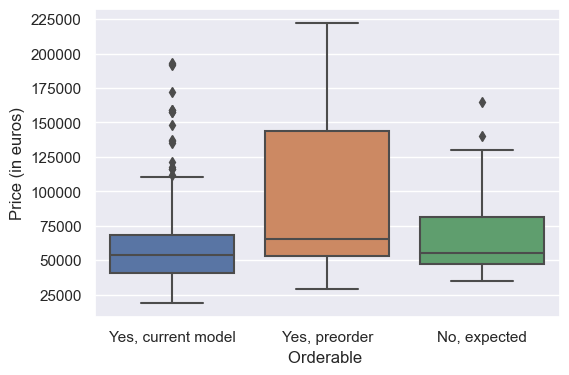

In [99]:
# show a boxplot of Price using seaborn
plt.rcParams['figure.figsize'] = [6,4]
sns.boxplot(y=df['Price (in euros)'],x=df['Orderable '])

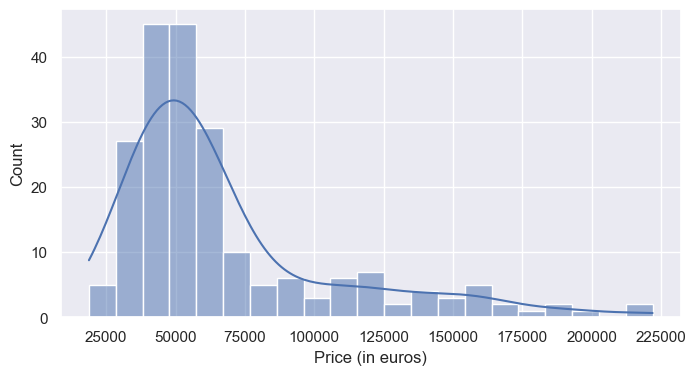

In [100]:
# show a plot of the distribution of Price with kde and make the plot bigger
plt.rcParams['figure.figsize'] = [8,4]
sns.histplot(df['Price (in euros)'],kde=True)
plt.show() #There are some outliers (Mercedes, Porsche, Tesla) 

In [47]:
# show the feature with the smallest correlation with Price
abs(df.corr()['Price (in euros)']).sort_values(ascending=True).head(1)

/var/folders/2m/7gvhhs715ydgyx00ps4pqjbc0000gn/T/ipykernel_8180/3306185361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['Price (in euros)']).sort_values(ascending=True).head(1)


Cost Fast charging (Euro per 100 km)   0.0005
Name: Price (in euros), dtype: float64

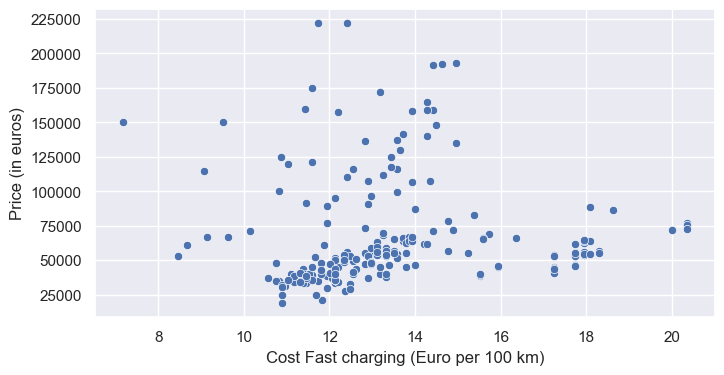

In [48]:
# show a scaterlpot of the feature with the smallest correlation with Price
plt.rcParams['figure.figsize'] = [8,4]
sns.scatterplot(x=df['Cost Fast charging (Euro per 100 km)'],y=df['Price (in euros)'])
plt.show()

In [49]:
#show the feature (except Price) with the highest correlation with Price
abs(df.corr()['Price (in euros)']).sort_values(ascending=False).head(2)

/var/folders/2m/7gvhhs715ydgyx00ps4pqjbc0000gn/T/ipykernel_8180/1137833483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['Price (in euros)']).sort_values(ascending=False).head(2)


Price (in euros)      1.0000
Total Power (in kW)   0.8767
Name: Price (in euros), dtype: float64

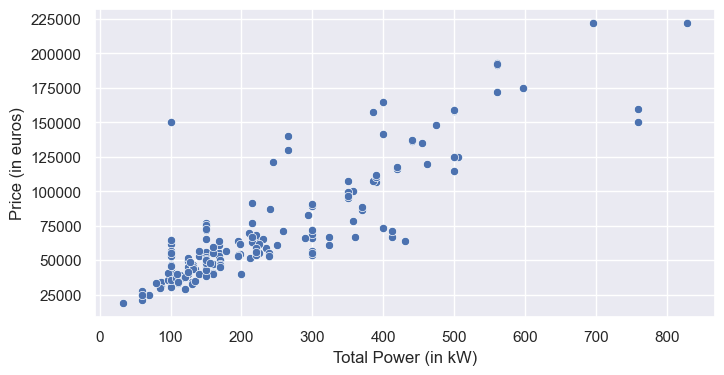

In [50]:
# show a scatterplot of the feature with the highest correlation with Price
plt.rcParams['figure.figsize'] = [8,4]
sns.scatterplot(x=df['Total Power (in kW)'],y=df['Price (in euros)'])
plt.show()

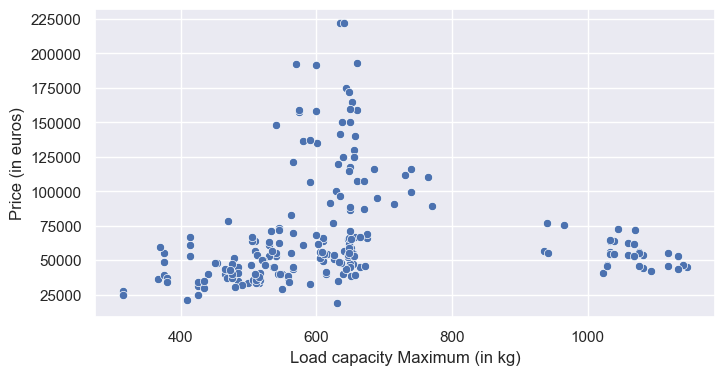

0.06408804629552249


In [101]:
# show the correlation between the load capacity and the price
plt.rcParams['figure.figsize'] = [8,4]
sns.scatterplot(x=df['Load capacity Maximum (in kg)'],y=df['Price (in euros)'])
plt.show() #There is a positive correlation between the load capacity and the price

# print the correlation between the load capacity and the price
print(df['Load capacity Maximum (in kg)'].corr(df['Price (in euros)']))

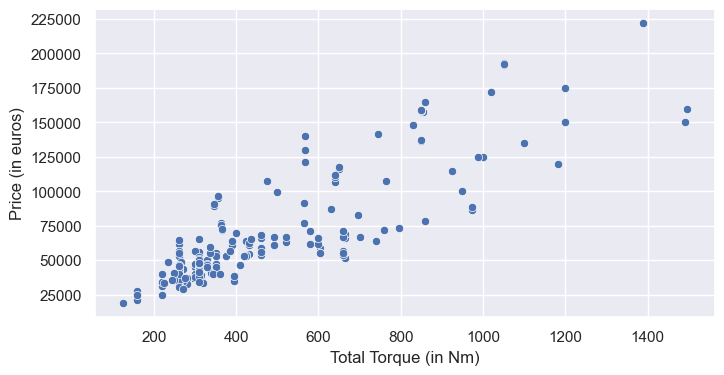

0.8580364988750743


In [102]:
# show the correlation between torque and the price
plt.rcParams['figure.figsize'] = [8,4]
sns.scatterplot(x=df['Total Torque (in Nm)'],y=df['Price (in euros)'])
plt.show() #There is a positive correlation between the torque and the price

# print the correlation between the torque and the price
print(df['Total Torque (in Nm)'].corr(df['Price (in euros)']))

<AxesSubplot: xlabel='Orderable ', ylabel='Price (in euros)'>

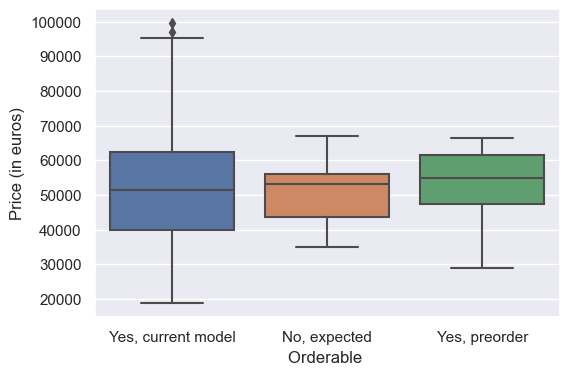

In [103]:
# remove the outliers
df_no_outliers=df[df['Price (in euros)']<100000]

## check for outliers in the data
# show a boxplot of Price using seaborn
plt.rcParams['figure.figsize'] = [6,4]
sns.boxplot(y=df_no_outliers['Price (in euros)'],x=df_no_outliers['Orderable '])

### Data Preprocessing

Encoding the Categorical Data

In [53]:
# save columns that are not floats or ints as df_str
df_str=df.select_dtypes(exclude=['float64','int64'])
# encode all columns in df_str as integers
le = LabelEncoder()
df_str=df_str.apply(le.fit_transform)
# add the encoded columns back to the dataframe
df=df.drop(df_str.columns,axis=1)
df=pd.concat([df,df_str],axis=1)

Rescaling the Data

In [54]:
scaler = preprocessing.StandardScaler()
# applying the scaler to all columns except the target column
df_scaled = scaler.fit_transform(df.drop(['Price (in euros)'],axis=1))

In [55]:
# convert the scaled data back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(['Price (in euros)'],axis=1).columns)
# add the target column back in
df_scaled['Price (in euros)'] = df['Price (in euros)']
df=df_scaled
df.head()

,Acceleration 0 - 100 km/h (in sec),Top Speed ​​(in km/h),Range Electric (in km),Total Power (in kW),Total Torque (in Nm),Charging capacity (in kW AC),Charging speed (in km/h),Battery Capacity Usable (in kWh),Fast charging power maximum in kW DC,Fast charging speed (in km/h),Cost Fast charging (Euro per 100 km),Length (in mm),Width with mirrors (in mm),Height (in mm),Mass Curb weight (in kg),Permitted Max. Mass (in kg),Load capacity Maximum (in kg),Towing weight Unbraked (in kg),Ball load Maximum (in kg),Seats,Orderable,Drive,Location Charging port,Towing hook Possible,Platform,Body,Segment,Roof rails,EV Specific Platform,Brand,Price (in euros)
0,-0.1193,-0.6555,-0.1368,-0.4487,-0.5515,0.1454,0.1317,-0.2090,-0.7605,-0.5232,-0.1736,0.0048,-0.2925,0.5180,-0.7420,-1.0296,-1.0391,0.3901,0.3679,-0.3537,-0.0876,1.1031,-2.2149,-0.4944,0.6389,-0.3219,-0.7638,1.3987,-0.1142,-1.7391,39950.0000
1,-0.6866,0.5430,0.1702,0.5631,0.7482,0.3772,-1.0345,0.9521,0.2066,0.3645,1.0981,0.5252,0.9604,-0.0186,1.5558,1.2297,0.1273,0.7770,0.8530,-0.3537,-0.0876,-1.1904,-0.1260,0.7565,1.1727,-0.3219,0.3348,1.3987,-1.2567,-1.6442,66400.0000
2,-1.1908,1.6217,0.6525,1.1701,0.6601,0.3772,-0.0608,0.8780,1.8951,2.2245,0.1313,0.7347,0.5759,-1.3346,0.9142,0.5553,-0.2945,-1.4046,-1.5037,-0.9676,-0.0876,-1.1904,1.2666,-1.7454,0.8168,0.3158,0.8841,-0.8015,1.0282,-1.6442,106390.0000
3,-1.4430,1.7415,0.5210,1.7434,1.3577,0.3772,-0.1999,0.8780,1.8951,2.0977,0.3519,0.7347,0.5759,-1.3346,1.1231,0.6003,-0.5427,-1.4046,-1.5037,-0.9676,-0.0876,-1.1904,1.2666,-1.7454,0.8168,0.3158,0.8841,-0.8015,1.0282,-1.6442,148420.0000
4,-1.0648,0.7827,-0.2245,1.0352,1.8828,0.3772,-1.5909,0.9521,0.2066,0.0264,2.0128,0.5275,-0.7248,0.0644,2.0482,1.5445,0.0033,0.7770,0.8530,-0.3537,-0.0876,-1.1904,-0.1260,0.7565,1.1727,-0.3219,0.3348,1.3987,-1.2567,-1.6442,86400.0000


Splitting the dataset into the Training set and Test set

In [64]:
x= df.drop(['Price (in euros)'],axis=1)
y= df['Price (in euros)']
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

### OLS Regression

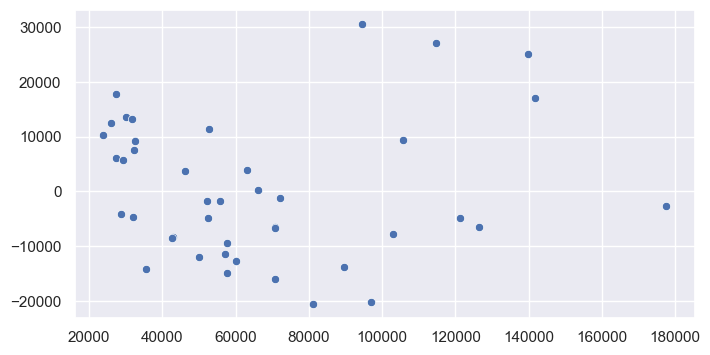

p-value:  0.18062728643417358


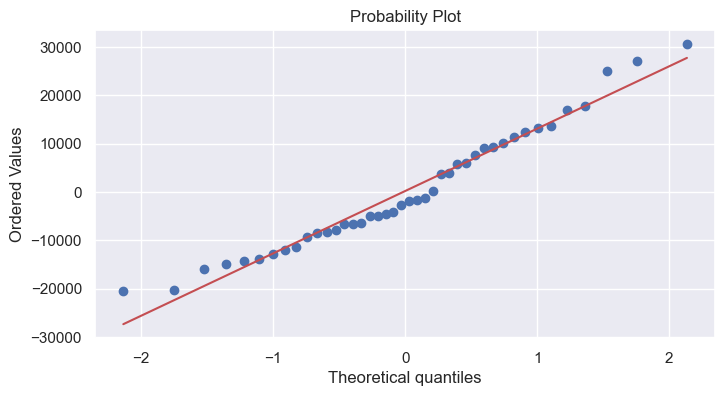

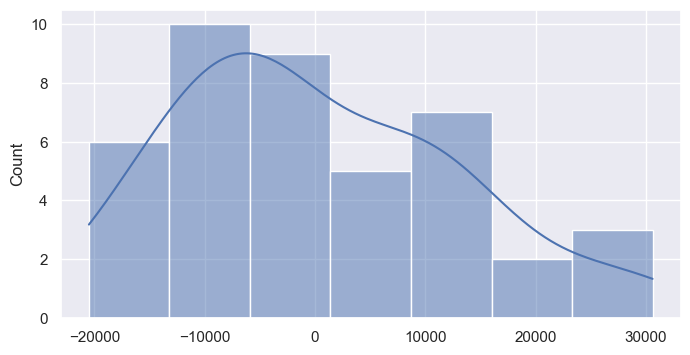

p-value:  0.3310649397901574


In [57]:
# check OLS model assumptions
# 1. Linearity
# 2. Normality of the error terms
# 3. No multicollinearity
# 4. No autocorrelation

# 1. Linearity
# 1.1. Residuals vs Fitted values using OLS
X=df.drop(['Price (in euros)'],axis=1)
y=df['Price (in euros)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model=sm.OLS(y_train,X_train).fit()
y_pred=model.predict(X_test)
residuals=y_test-y_pred
sns.scatterplot(x=y_pred,y=residuals)
plt.show() #The residuals are randomly distributed around zero

# perform a test to check if the residuals are normally distributed
from scipy.stats import shapiro
_,pvalue=shapiro(residuals)
print('p-value: ',pvalue) #The p-value is greater than 0.05, so we can assume that the residuals are normally distributed

# 1.2. Q-Q plot
import scipy.stats as stats
stats.probplot(residuals,dist='norm',plot=plt)
plt.show() #The residuals are normally distributed

# 2. Normality of the error terms
# 2.1. Histogram
sns.histplot(residuals,kde=True)
plt.show() #The residuals are normally distributed

# 2.2. Jarque-Bera test
from scipy.stats import jarque_bera
_,pvalue=jarque_bera(residuals)
print('p-value: ',pvalue) #The p-value is greater than 0.05, so we can assume that the residuals are normally distributed


In [60]:
# show the feature with the highest p-value
print(model.pvalues.sort_values(ascending=False))

Width with mirrors (in mm)              0.0465
Fast charging power maximum in kW DC    0.0292
Cost Fast charging (Euro per 100 km)    0.0267
EV Specific Platform                    0.0091
Top Speed ​​(in km/h)                   0.0063
Segment                                 0.0039
Length (in mm)                          0.0024
Location Charging port                  0.0009
Seats                                   0.0003
Platform                                0.0001
Total Power (in kW)                     0.0001
Acceleration 0 - 100 km/h (in sec)      0.0000
Range Electric (in km)                  0.0000
Ball load Maximum (in kg)               0.0000
Total Torque (in Nm)                    0.0000
const                                   0.0000
dtype: float64


In [59]:
# remove the feature with the highest p-value + DROPPED PERMITTED MAX MASS because of high correlation with Load capacity Maximum (0.9)
X=df.drop(['Price (in euros)','Brand','Body','Battery Capacity Usable (in kWh)','Drive','Height (in mm)','Roof rails','Charging capacity (in kW AC) ','Charging speed (in km/h)','Towing hook Possible','Towing weight Unbraked (in kg) ','Fast charging speed (in km/h)','Permitted Max. Mass (in kg)','Mass Curb weight (in kg)','Load capacity Maximum (in kg)','Orderable '],axis=1)
y=df['Price (in euros)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model=sm.OLS(y_train,X_train).fit()
y_pred=model.predict(X_test)
print('R2 score: ',r2_score(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
# print AIC and BIC
print('AIC: ',model.aic)
print('BIC: ',model.bic)

R2 score:  0.8910001299005466
RMSE:  13054.99805924124
AIC:  3627.1333477096805
BIC:  3677.116771380133


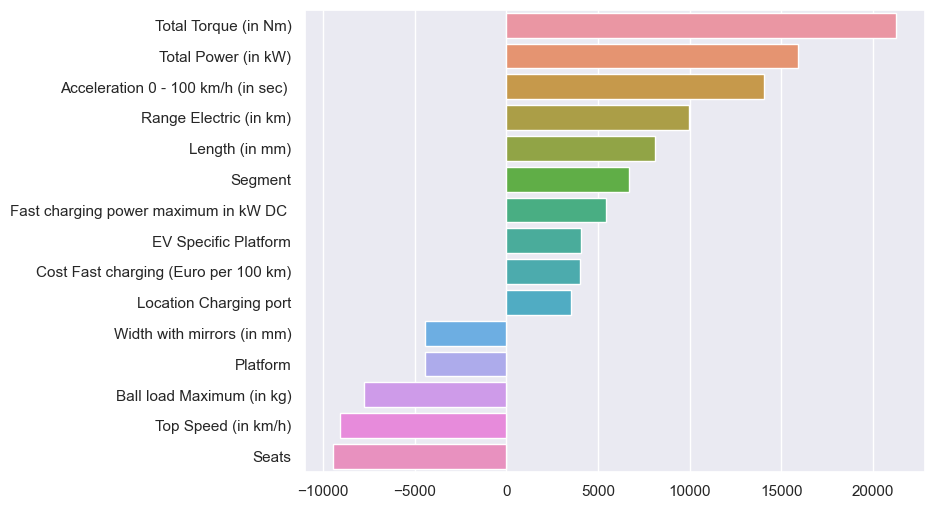

In [62]:
# visualize feature importance for the model in a horizontal barplot without const and sort them
plt.rcParams['figure.figsize'] = [8,6]
sns.barplot(x=model.params.drop('const').sort_values(ascending=False),y=model.params.drop('const').sort_values(ascending=False).index)
plt.show()

In [11]:
# show the coefficients for the model
print(model.params)

const                                   67723.3619
Acceleration 0 - 100 km/h (in sec)      14082.1778
Top Speed ​​(in km/h)                   -9098.3576
Range Electric (in km)                  9967.1477 
Total Power (in kW)                     15932.3185
Total Torque (in Nm)                    21285.9797
Fast charging power maximum in kW DC    5417.5692 
Cost Fast charging (Euro per 100 km)    4008.2038 
Length (in mm)                          8102.7003 
Width with mirrors (in mm)              -4423.1654
Ball load Maximum (in kg)               -7768.5896
Seats                                   -9475.9704
Location Charging port                  3518.1566 
Platform                                -4424.2615
Segment                                 6667.1370 
EV Specific Platform                    4047.8050 
dtype: float64


### Decision Tree Regression ---> Overfitting training set !

In [78]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.786340030724214

In [80]:
# creat decsiion tree regressor with max_depth=5
dt_regressor = DecisionTreeRegressor(max_depth=5,random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.7838124896901373

In [81]:
# show metrics scores for the decision tree model
print('Decision Tree')
print('Train R2 score: ',r2_score(y_train,y_train_pred))
print('Test R2 score: ',r2_score(y_test,y_test_pred))
print('Train RMSE score: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE score: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Decision Tree
Train R2 score:  0.986766237698686
Test R2 score:  0.7838124896901373
Train RMSE score:  4509.956845481048
Test RMSE score:  19081.39579967647


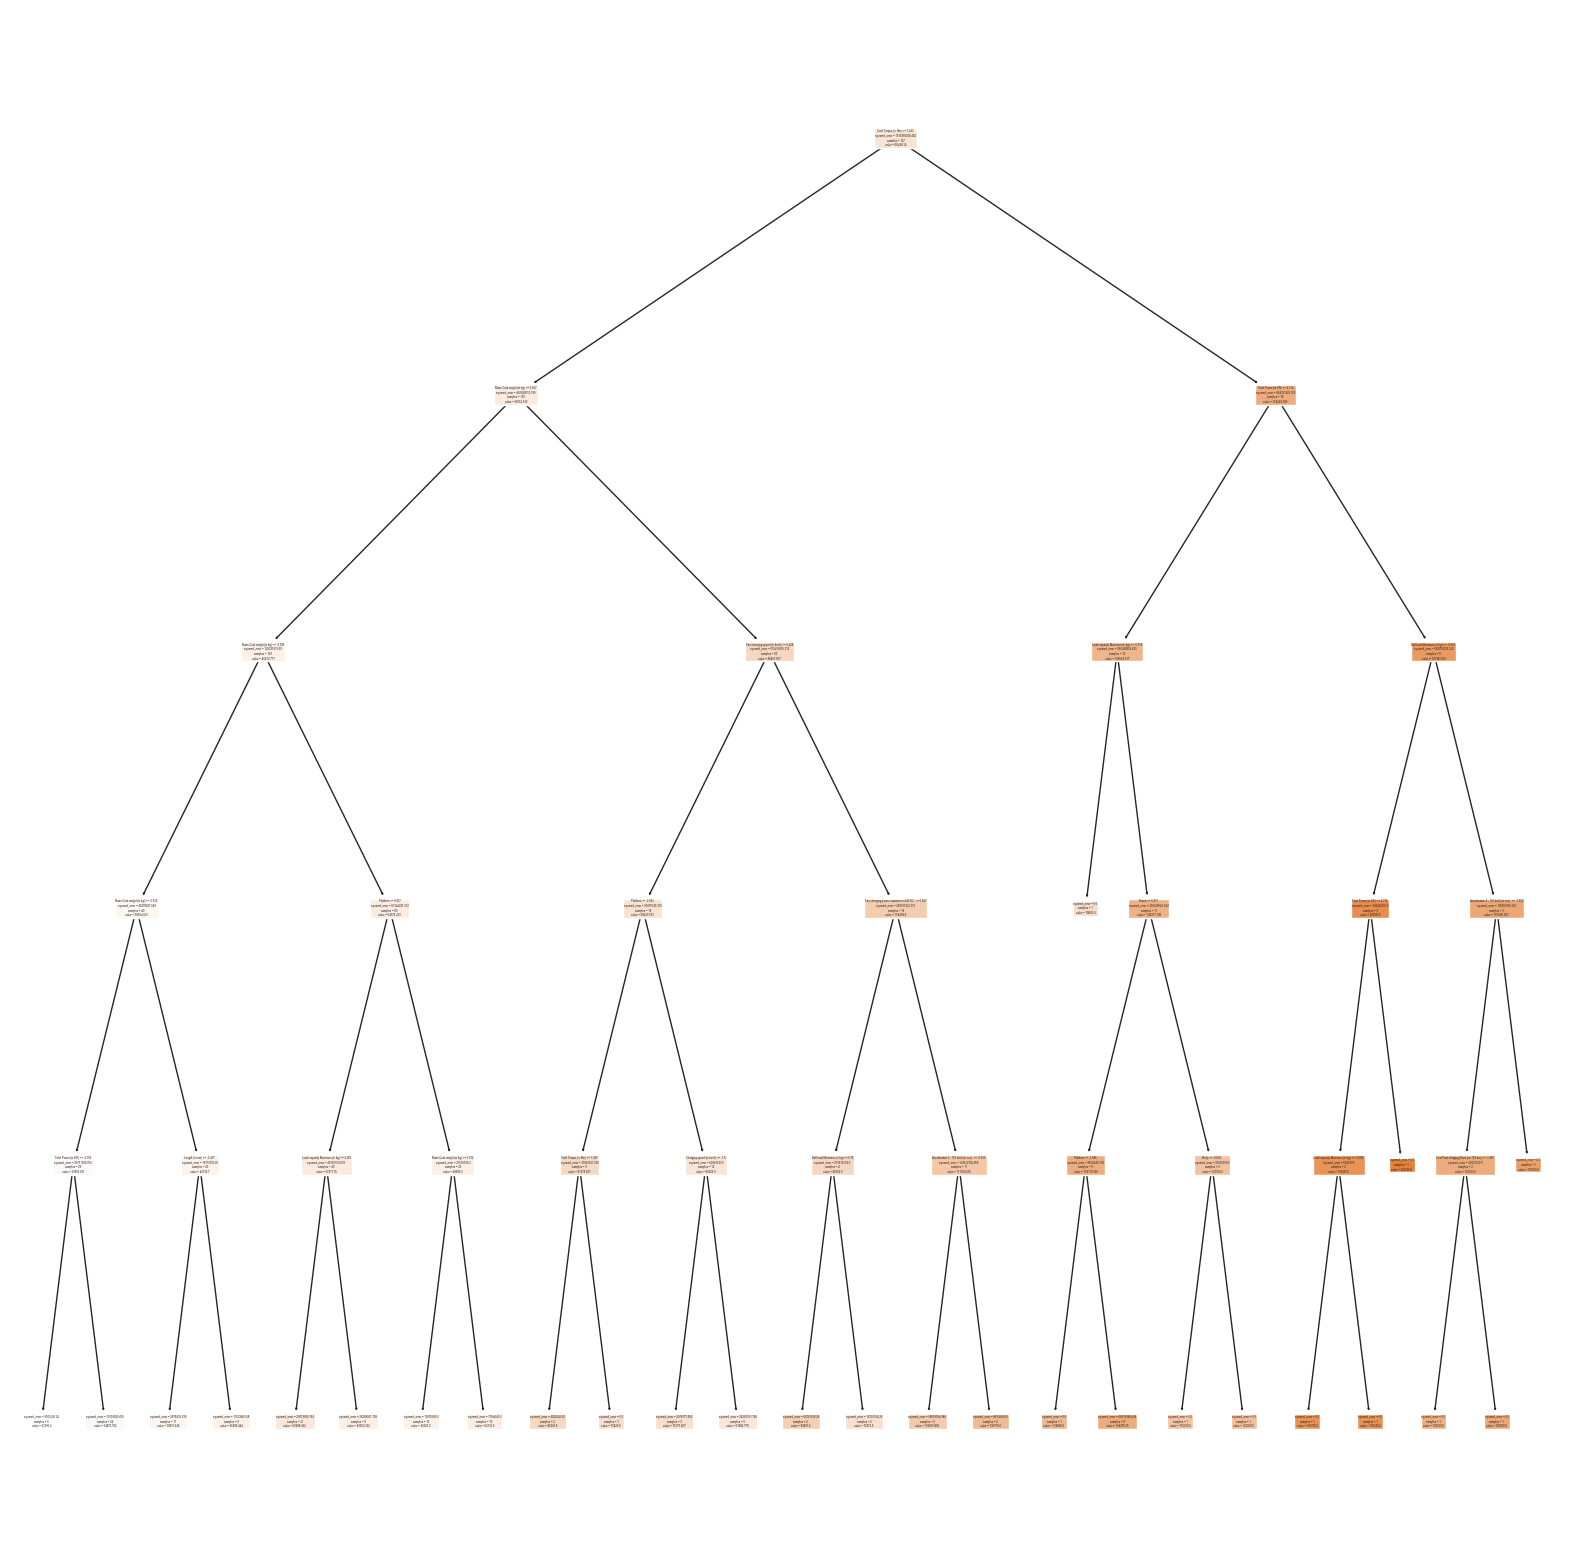

In [70]:
# make imports for showing decision tree
from sklearn.tree import plot_tree
# show the decision tree using the plot_tree function
plt.rcParams['figure.figsize'] = [20,20]
plot_tree(dt_regressor,feature_names=x.columns,filled=True)
plt.show()

### Random Forest Regression

In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [18]:
x= df.drop(['Price (in euros)'],axis=1)
y= df['Price (in euros)']
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   1.0s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   1.0s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   1.0s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   1.0s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.1s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.2s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.1s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1100; total time=   0.4s
[CV] END bootstrap=False, m

/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.5s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   0.7s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   0.7s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   0.7s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   0.7s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   0.7s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   0.4s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/valentin/.pyenv/versions/3.10.0/envs/default-3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   0.5s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [19]:
# show the best parameters
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [20]:
# create a tree using the best parameters
rf = RandomForestRegressor(n_estimators= 733,
    min_samples_split= 5,
    min_samples_leaf= 1,
    max_features= 'sqrt',
    max_depth= 5,
    bootstrap= True)


In [21]:
rf.fit(x_train,y_train)
Rf_train_pred = rf.predict(x_train)
Rf_test_pred = rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9344004951228341

In [79]:
# show metrics scores for the decision tree model
print('Random Forest')
print('Train R2 score: ',r2_score(y_train,Rf_train_pred))
print('Test R2 score: ',r2_score(y_test,Rf_test_pred))
print('Train RMSE score: ',np.sqrt(mean_squared_error(y_train,Rf_train_pred)))
print('Test RMSE score: ',np.sqrt(mean_squared_error(y_test,Rf_test_pred)))

Random Forest
Train R2 score:  0.971296342361371
Test R2 score:  0.9425942835538329
Train RMSE score:  6642.007200109366
Test RMSE score:  9832.691440217253


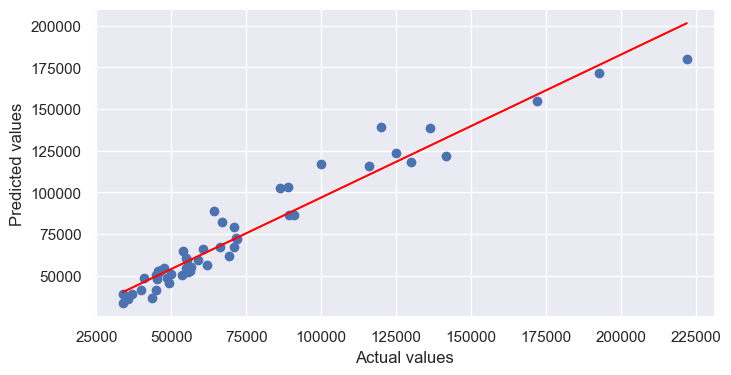

In [23]:
# create a scatterplot of the predicted values vs the actual values
plt.rcParams['figure.figsize'] = [8,4]
plt.scatter(y_test,Rf_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# add the line of best fit
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, Rf_test_pred, 1))(np.unique(y_test)),color='red')
plt.show()

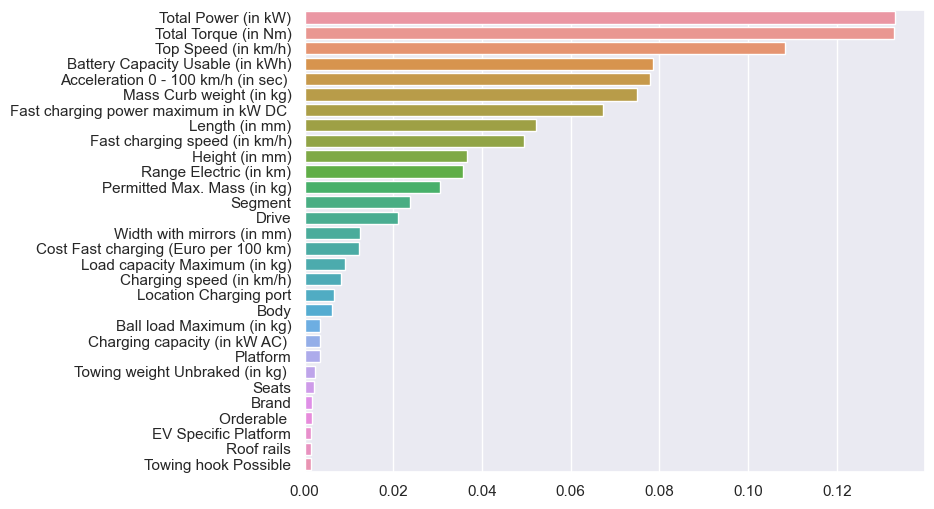

In [88]:
# show feature importance for the random forest model
coef1 = pd.Series(rf.feature_importances_, x.columns).sort_values(ascending=False)
# show the feature importance in a horizontal barplot
plt.rcParams['figure.figsize'] = [8,6]
sns.barplot(x=coef1,y=coef1.index)
plt.show()

## Price-Quality Ratio for Range

In [140]:
df_range=pd.read_excel('BEV_range.xlsx')

In [146]:
df_range.head(10)

,Vehicle,Price,Range City - Winter,Range Highway - Winter,Range Combined - Winter,Range City - Summer,Range Highway - Summer,Range Combined - Summer,Range Electric,Average KM/€,Average €/KM
0,Aiways U5,39950.0000,0.0084,0.0059,0.0070,0.0124,0.0074,0.0095,0.0083,0.0084,118.6634
1,Audi e-tron 55 quattro,66400.0000,0.0055,0.0040,0.0047,0.0078,0.0050,0.0062,0.0055,0.0055,180.6803
2,Audi e-tron GT quattro,106390.0000,0.0038,0.0029,0.0033,0.0055,0.0037,0.0045,0.0039,0.0039,253.3095
3,Audi e-tron GT RS,148420.0000,0.0027,0.0020,0.0023,0.0038,0.0025,0.0031,0.0027,0.0027,365.7166
4,Audi e-tron S,86400.0000,0.0038,0.0027,0.0032,0.0052,0.0033,0.0041,0.0037,0.0037,270.0000
5,Audi e-tron S Sportback,88800.0000,0.0038,0.0027,0.0032,0.0052,0.0034,0.0042,0.0037,0.0037,267.0677
6,Audi e-tron Sportback 55 quattro,68800.0000,0.0055,0.0040,0.0047,0.0078,0.0050,0.0062,0.0055,0.0055,181.0526
7,Audi Q4 e-tron 35,49350.0000,0.0057,0.0041,0.0049,0.0085,0.0053,0.0066,0.0058,0.0058,171.6522
8,Audi Q4 e-tron 40,54160.0000,0.0075,0.0054,0.0064,0.0110,0.0068,0.0086,0.0075,0.0076,131.5628
9,Audi Q4 e-tron 45 quattro,64110.0000,0.0060,0.0043,0.0051,0.0087,0.0055,0.0069,0.0060,0.0061,164.3846


In [142]:
# divide all colmns starting with 'Range' by the value in the Price Column
for col in df_range.columns:
    if col.startswith('Range'):
        df_range[col]=df_range[col]/df_range['Price']

In [143]:
# show the Vehicle with the highest km/euro for each column
for col in df_range.columns:
    if col.startswith('Range'):
        print(col,df_range[col].max(),df_range['Vehicle'][df_range[col].idxmax()])

Range City - Winter 0.010306863434059498 Volkswagen ID.3 Pro S
Range Highway - Winter 0.007495900679315999 Volkswagen ID.3 Pro S
Range Combined - Winter 0.00890138205668775 Volkswagen ID.3 Pro S
Range City - Summer 0.015460295151089248 Volkswagen ID.3 Pro S
Range Highway - Summer 0.009721246193487937 Volkswagen ID.3 Pro S
Range Combined - Summer 0.012180838603888498 Volkswagen ID.3 Pro S
Range Electric  0.010541110330288124 Volkswagen ID.3 Pro S


In [144]:
# create new column with the average km/euro
df_range['Average KM/€']=df_range.iloc[:,2:8].mean(axis=1)

In [145]:
# invert the last column and call it 'Average €/KM'
df_range['Average €/KM']=1/df_range['Average KM/€']

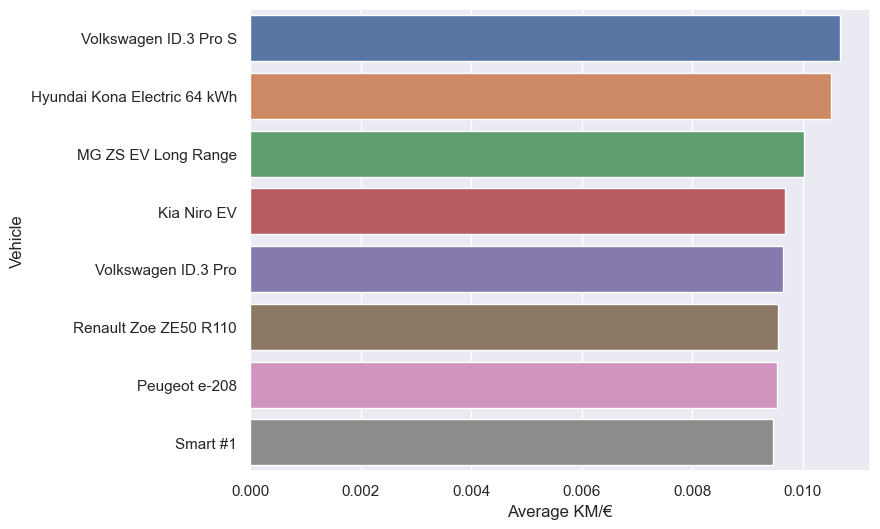

In [152]:
# show a horizontal barplot for the average range per price for the ten vehicles with the lowest value in the 'Average €/KM' column
plt.rcParams['figure.figsize'] = [8,6]
sns.barplot(x=df_range.sort_values(by='Average €/KM',ascending=True).head(10)['Average KM/€'],y=df_range.sort_values(by='Average €/KM',ascending=True).head(10)['Vehicle'])
plt.xlabel('Average KM/€')
plt.ylabel('Vehicle')
plt.show()